```
Autores:

   - Nelson Gonzales Huisa
   - Muñoz Pacheco Enit
   - Lucero Quispe Puma
   - Briggitte Ugarte Castillo
   - Yurema Tintaya Taco
```

# EL ALGORITMO  APRIORI






---



## ¿Qué es el algoritmo Apriori?

El **algoritmo Apriori**  se utiliza para poder extraer  conjuntos de datos frecuentes y luego se diseña la regla de asosciacion apartir de un conjunto de datos.                                                                  

Actualmente muchas empresas hacen uso de esto. Alguna vez nosotros mismo experimentamos esto cuando vamos de compras y al momento de comprar llegamos a comprar mas de lo previsto. Esto se debe a que muchas empresas ya conocen que es lo que compran con frecuencia sus clientes entonces segun a eso ofertan sus productos.

## Reglas de Asociacion

Esta viene a ser  la parte asencial del algoritmo Apriori ya que nos permite asociaar los elementos de una base de datos para poder encontrar patrones. En palabras sencillas, significa la dependencia de un artículo con respecto a otro, la probabilidad de que un artículo sea seleccionado dado que algún otro artículo ya está seleccionado. Podemos decir que si he comprado el artículo A, entonces es probable que compre el artículo B, si te fijas, lo que se nota aquí son dos palabras importantes, sí y entonces.

Una regla de asosciacion tiene 2 partes:


*   Un antecedente (si) y
*   Un consecuente (entonces)



Un antecedente es algo que se encuentra en los datos, y un consecuente es un elemento que se encuentra en combinación con el antecedente. En pocas palabras, puede entenderse como una regla de asociación de una tienda para dirigirse mejor a tus clientes.

Si la regla anterior es el resultado de un análisis exhaustivo de algunos conjuntos de datos, puede utilizarse no solo para mejorar el servicio al cliente, sino también para mejorar los ingresos de la empresa.

Por esto podemos entender si tenemos datos exhaustivos de cómo se compran 2 productos o cómo se compra un producto con otro, podemos aumentar el alcance de los clientes dando recomendaciones y ofertas.

Para hacer este análisis, es obvio que tendríamos que utilizar algunas herramientas matemáticas y hay tres componentes principales:


*   Soporte 
*   Confianza
*   Lift





Acontinuacion mostraremos un ejemplo:

En el ejemplo se tiene una serie de transacciones que podria ser en compras.




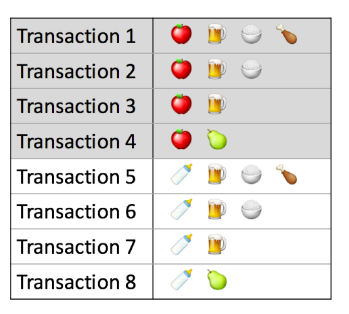






###calculamos el **soporte** para la manzana:


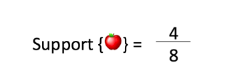



Aqui podemos ver que que el suporte de la manzana es 4/8 donde el 4 indica el numero de veces que aparece la manzana en las 4 transacciones y el 8 indica el total de transacciones.

###Calculo de la **Confianza** para la compra de la cerveza si se compra manzana.

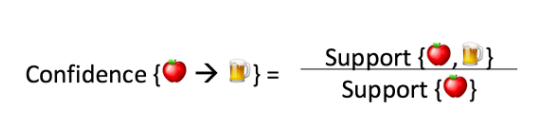


a qui podemos observar que para calcular la confianza de {manzana  ->  cerveza} necesitamos saber el soporte de {manzana,cerveza} y soporte de {manzana}


1.   {manzana,cerveza} es 3/8 porque aparece 3 veces en las 8 transacciones.
2.   {manzan} es 4/8

entonces el resultado es de:

$\frac{{manzana,cerveza}}{{manzana}} = \frac{3}{4}$


### calculo del **Lift** para la compra de la cerveza si se compra manzana.

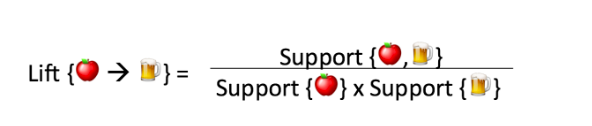


para el calculo de Lift de {manzana,cerveza} necesitamos el soporte de {manzana,cerveza}, soporte de manzana y soporte de cerveza.


1.   soporte {manazana,cerveza} es 3/8 por que aparece 3 veces en las 8 transacciones.
2.   soporte de {manzana} es 4/8 por que aparece 4 veces en las 8 transacciones
3.   soporte {cerveza} es 6/8 por que aparece 6 veces en las 8 transacciones

entonces el resultado es de:

$\frac{{manzana,cerveza}}{{manzana}*{cerveza}} =1$

El LIft puede tener valores mayores a cero o menores. 
1.    si es mayor a cero quiere decir que es mas probable que se cumpla esa regla.
2.     si es menor a cero quiere decir que es menos probable que se cumpla esa regla.





## Pseudocodigo del Algoritmo Apriori
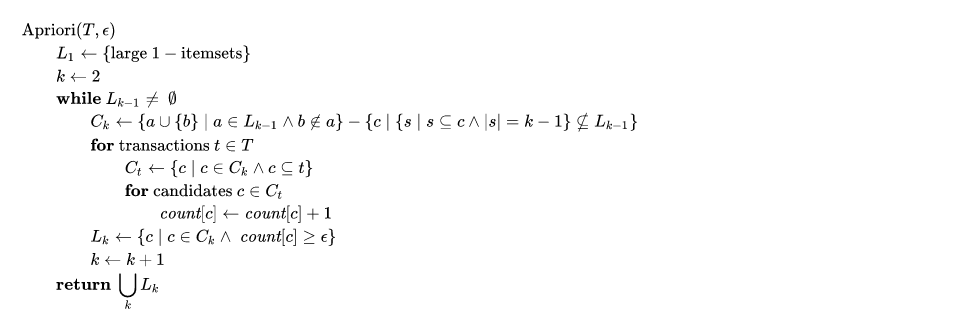

In [ ]:
import pandas as pd
import numpy as np
import collections

In [ ]:
"""Esta funcion nos servira para poder obtener nuestras combinaciones de itemset(canciones)
"""
def combinaciones(entrada, long_salida):
  aux = tuple(entrada)
  n = len(aux)
  if long_salida > n:
      return
  indices = list(range(long_salida))
  yield tuple(aux[i] for i in indices)

  while True:
      for i in reversed(range(long_salida)):
          if indices[i] != i + n - long_salida:
              break
      else:
          return
      indices[i] += 1
      for j in range(i + 1, long_salida):
          indices[j] = indices[j - 1] + 1
      yield tuple(aux[i] for i in indices)

In [ ]:
class Apriori:
  # inicializamos nuestros atributos
  def __init__(self, datos,  min_support = 0, confidence = 0, lift = 0):
    self.datos = datos
    self.min_support = min_support
    self.confidence = confidence
    self.lift = lift

  """ 
  -Con esta funcion convertimos 'spotify.npy' en una lista.
  -eliminamos las canciones repetidas (transformacion en conjunto)
  -guardamos en una variable las veces que una cancion se repite dentro de la playlist
  """
  def procesar_data(self):
    self.playlists = list(self.datos.item().values()) # convertir en lista
    self.playlists = [set(playlist) for playlist in self.playlists] # convertimos en conjunto para eliminar canciones repetidas
    canciones = [item for sublista in self.playlists for item in sublista]
    self.songs_counter = pd.Series(data=canciones).value_counts().to_dict()

  """
  -Con este funcion generamos un diccionario con las canciones y indice de las listas
   EJEMPLO => {'cancion1': {0, 1, 3, 4, 5, 7, 8}, 'cancion2': {0, 2, 3, 4, 6, 7, 8}, 'cancion3': {0, 1, 3, 5, 7}, ...}
  """
  
  def obtener_apariciones_canciones(self):
    canciones_en_playlists = collections.defaultdict(set) # Creamos un dicionario de tuplas
    for indice, playlist in enumerate(self.playlists): #recorremos las playlists
      for cancion in playlist: #Para cada cancion agregamos sus indices en el diccionario
          canciones_en_playlists[cancion].add(indice)
    self.songs_in_playlists = canciones_en_playlists

  """
  - Esta funcion obtiene itemset frecuentes largos, aquellos itemsets que 
    que aparecen mas veces que el min_support. 
   EJEMPLO: [{'cancion1'}, {'cancion2'}, {'cancion3'}, ...]
  """
  def generar_itemset_frecuentes_largos_L_i(self):
    #verificamos que se agreguen canciones que sobrepasen el min_support
    self.L_1_counter = { cancion: tiempos for cancion, tiempos in self.songs_counter.items() if tiempos / len(self.playlists) >= self.min_support }
    self.L_1 = [{cancion} for cancion in self.L_1_counter.keys()]
    #print("====L_1====",self.L_1)


  """
  -Esta funcion obtiene posibles Candidatos itemsets frecuentes, para eso usaremos 
  la union de conjuntos
  EJEMPLO: {({'cancion1', 'cancion2'}),({'cancion2', 'cancion3'}),...                                                 
          {({'cancion1', 'cancion2','cancion3'}),({'cancion2', 'cancion3','cancion4'}),...
          {({'cancion1', 'cancion2', 'cancion3', 'cancion4'}), ({'cancion3', 'cancion4', 'cancion5', 'cancion1'}),...
          ...
          ...
  """
  def candidatos_posibles_itemsets_frecuentes(self, current_itemsets, k):
    C_k = set()
    m = k - 2
    for candidato in current_itemsets:
      candidato = list(candidato) # convertimos en lista los posibles items sets frecuentes
      for aux_candidate in current_itemsets:
        aux_candidate = list(aux_candidate)
        can_join = True
        for i in range(k - 2):
          if candidato[i] != aux_candidate[i]:
            can_join = False
            break
        if not can_join:
          continue
        if candidato[k - 2] < aux_candidate[k - 2]:
          c = candidato + [aux_candidate[k - 2]]
          c = frozenset(sorted(c))
          C_k.add(c)
    
    return C_k
  
  """ 
  esta funcion obtienemos el min_support de itemset luego hacemos interseccion con las playlists
  para despues devolver el tamaño del itemset

  """
  def calculate_subset_count(self, subset):
    playlists_inter = []
    for song in subset:
      playlists_inter.append(self.songs_in_playlists[song]) # 
    i=set.intersection(*playlists_inter) # haciendo la interseccion
    return len(i)

  """ 
  Esta funcion nos retorna un conjunto de itemsets tomando en cuenta el min_support
  EJEMPLO: {({'cancion1', 'cancion2'}):6,({'cancion2', 'cancion3'}):9,...                                                 
          {({'cancion1', 'cancion2','cancion3'}):8,({'cancion2', 'cancion3','cancion4'}):9,...
          {({'cancion1', 'cancion2', 'cancion3', 'cancion4'}):2, ({'cancion3', 'cancion4', 'cancion5', 'cancion1'}):3,...
          ...
          ...
  podemos ver que cada elemento es uan agrupacion de canciones con el numero de veces que aparece en la playlist.
  """
  def podar_itemsets(self, C_k):
    C_k_counter = {}
    playlist_length = len(self.playlists)
    for candidate in C_k:
      C_k_counter[candidate] = self.calculate_subset_count(candidate)
    L_k_counter = { subset: times for subset, times in C_k_counter.items() if times / playlist_length >= self.min_support}
    return L_k_counter

  """ 
  - Esta funcion nos permite exportar los itemsets frecuentes a csv, con el fin de ver de mejor manera los resultados
  """
  def export_frequent_itemsets_to_csv(self):
    self.frequent_itemsets_df = pd.DataFrame([item for sublist in self.k_frequent_itemsets.values() for item in sublist]).round(3)
    self.frequent_itemsets_df.columns = ["itemset", "count_support"]
    self.frequent_itemsets_df["support"] = self.frequent_itemsets_df["count_support"] / len(self.playlists) # support
    print("Generando archivo de itemsets frecuentes.") # mostramos mensaje de informacion
    self.frequent_itemsets_df.to_csv("itemsets_frecuentes.csv", index="False") # guardamos los itemsets frecuentes en el archivo.csv

    return self.frequent_itemsets_df

  """
   Esta funcion nos genera los itemsets frecuentes
  """
  def get_frequent_itemsets(self):
    self.procesar_data() #Preparamos los datos de la playlists
    self.obtener_apariciones_canciones() # obtenemos itemsets frecuentes
    self.generar_itemset_frecuentes_largos_L_i() # generamos las itemsets que superen el min_support
    self.k_frequent_itemsets = {}
    self.k_frequent_itemsets[1] = sorted(self.L_1_counter.items(), key=lambda x: x[1], reverse=True)
    self.frequent_itemsets_length_gt2 = []
    k = 2
    current = self.L_1
    while len(current) != 0:
      C_k = self.candidatos_posibles_itemsets_frecuentes(current, k)
      L_k_counter = self.podar_itemsets(C_k)
      L_k = L_k_counter.keys()
      self.frequent_itemsets_length_gt2.extend(L_k)
      self.k_frequent_itemsets[k] = sorted(
        L_k_counter.items(), key=lambda x: x[1], reverse=True)
      k += 1
      current = L_k
    self.export_frequent_itemsets_to_csv()
  
 

  """
  Esta funcion genera todas las combianciones de un itemset(canciones)
  """
  def get_association_rule_from_itemset(self, itemset):
    itemset_count = self.calculate_subset_count(itemset)
    itemset_support = itemset_count / len(self.playlists)
    for i in range(1, len(itemset) + 1):
      for x_set in combinaciones(itemset, i):
        x_set = set(x_set)
        y_set = set(itemset) - x_set
        x_support = self.calculate_subset_count(x_set) / len(
          self.playlists)
        x_y_support = self.calculate_subset_count(
          x_set.union(y_set)) / len(self.playlists)
        rule_confidence = x_y_support / x_support
        if len(x_set) > 0 and len(y_set) > 0:
          y_support = self.calculate_subset_count(y_set) / len(
            self.playlists)
          rule_lift = x_y_support / (x_support * y_support)
          self.rules.append((x_set, y_set, rule_confidence, x_y_support, rule_lift))

  """ 
  Esta Funcion genera las reglas de asociaciion posibles, todo esto a partir 
  de los itemsets(canciones) frecuentes
  """
  def generate_association_rules(self):
    self.rules = [] # inicializamos un arreglo vacio
    for itemset in self.frequent_itemsets_length_gt2: 
      self.get_association_rule_from_itemset(itemset) # obtenemos las reglas de asociacion para cada itemset
    self.exportar_reglas() # Exportamos las reglas de asociacion

  """ 
  Esta funcion exportar las reglas de asociacion al formato csv con la libreria  pandas
  """
  def exportar_reglas(self):
    self.rules_df = pd.DataFrame(data=self.rules, columns=["anterior", "siguiente", "confidence", "support", "lift"]).round(3) # creamos un data frame con las etiquetas
    print("Generando archivo de reglas de asociacion.") # Mensaje de informacion
    self.rules_df["anterior"] = list(map(tuple, self.rules_df["anterior"])) # mapeamos los anteriores
    self.rules_df["siguiente"] = list(map(tuple, self.rules_df["siguiente"])) #mapeamos los siguientes
    self.rules_df.to_csv("reglas_de_asociacion.csv", index=False) # guardamos el data frame en un archivo .csv
    return self.rules_df

  """
   Este funcion retorna las n reglas de asociacion con mayor confidencia, pero podemos utilizar  a lift
  """
  def obtener_reglas_asociaciacion(self, n, ordenado_por="confidence"): # tambien se puede cambiar Confidence ===>  lift
    sorted_data_frame = self.rules_df.sort_values(ordenado_por, ascending=False).head(n) # data frame
    print("Genrando top {} reglas ordenado por {}.".format(n, ordenado_por)) # mostrar mensaje de informacion
    sorted_data_frame.to_csv("top_{}_rule_by_{}.csv".format(n, ordenado_por), index=False) # generar un archivo .csv del data frame ordenado
    return sorted_data_frame

  """
  Esta funcion filtra todas las reglas segun condifence y lift o ambos por separado
  """
  def filtrar_reglas(self, filtrar_por="ambos"):
    if filtrar_por == "ambos": # ambos significa confidence y lift
      filtered_rules = self.rules_df[(self.rules_df["confidence"] >= self.confidence)& (self.rules_df["lift"] >= self.lift)]
    elif filtrar_por == "confidence": # filtrar solo por confidence
      filtered_rules = self.rules_df[self.rules_df["confidence"] >= self.confidence].sort_values(filtrar_por, ascending=False)
    else:
      filtered_rules = self.rules_df[
        self.rules_df["lift"] >= self.lift].sort_values(filtrar_por, ascending=False)
    display(filtered_rules.head(10)) # filtrar solo 10 reglas
    filtered_rules.to_csv("reglas_filtradas.csv", index=False)
    print("Primeras 1o reglas de asociacion filtradas")

## Leemos archivo desde drive

1.Leemos los archivos del drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
spotify = np.load("/content/drive/MyDrive/mineria de datos/Copia de spotify.npy", allow_pickle=True)


2.Usamos la class A priori con los siguientes parametros:

In [ ]:
apriori = Apriori( datos=spotify, min_support=0.01, confidence=0.5, lift=1.2)

3.Generamos la frecuencia del conjunto de datos(canciones del playlist):

In [ ]:
apriori.get_frequent_itemsets()

Generando archivo de itemsets frecuentes.


4.Generamos las reglas de asociación:

In [ ]:
r=apriori.generate_association_rules()
r

Generando archivo de reglas de asociacion.


5.Mostramos las 10 primeras reglas de asociación según el orden del parámetro confidence(estas 10 tienen mayor confidence de  probabilidad de que la música siguiente se escuche una vez la anterior se haya terminado de escuchar):

In [ ]:
apriori.obtener_reglas_asociaciacion(10)

Genrando top 10 reglas ordenado por confidence.


,anterior,siguiente,confidence,support,lift
351,"(Mask Off, DNA.)","(HUMBLE.,)",0.909,0.010,19.550
381,"(XO TOUR Llif3, DNA.)","(HUMBLE.,)",0.864,0.010,18.589
137,"(DNA.,)","(HUMBLE.,)",0.823,0.019,17.688
387,"(XO TOUR Llif3, Mask Off)","(HUMBLE.,)",0.804,0.013,17.283
439,"(Broccoli (feat. Lil Yachty), Bounce Back)","(Bad and Boujee (feat. Lil Uzi Vert),)",0.775,0.010,22.469
405,"(XO TOUR Llif3, Slippery (feat. Gucci Mane))","(HUMBLE.,)",0.765,0.010,16.455
374,"(Tunnel Vision, XO TOUR Llif3)","(HUMBLE.,)",0.750,0.010,16.129
447,"(Congratulations, Mask Off)","(HUMBLE.,)",0.747,0.012,16.063
417,"(Mask Off, Bounce Back)","(HUMBLE.,)",0.743,0.010,15.971
411,"(Mask Off, goosebumps)","(HUMBLE.,)",0.743,0.011,15.984


6.La confianza nos indica la probabilidad de que escuchemos la canción siguiente, en la imagen observamos las 4 primeras reglas donde la regla 351 indica que tiene una probabilidad casi del 100% de si escuchamos Mask Off y DNA ambos de genero HIP-HOP es muy probable que la siguiente que se escuche sea HUMBLE de genero HIP-HOP también.

In [ ]:
apriori.obtener_reglas_asociaciacion(4,"confidence")

Genrando top 4 reglas ordenado por confidence.


,anterior,siguiente,confidence,support,lift
351,"(Mask Off, DNA.)","(HUMBLE.,)",0.909,0.010,19.550
381,"(XO TOUR Llif3, DNA.)","(HUMBLE.,)",0.864,0.010,18.589
137,"(DNA.,)","(HUMBLE.,)",0.823,0.019,17.688
387,"(XO TOUR Llif3, Mask Off)","(HUMBLE.,)",0.804,0.013,17.283


7.el lift indica la probabilidad de que escuchemos una canción siguiente, una vez escuchada la canción actual dependiendo de la popularidad de la música, la regla 56 indica que X(feat.Future) de genero Hip-hop/rap tiene alta probabilidad de ser escuchada una vez terminada la canción anterior que es NO HEART de genero Hip-hop/rap , ambos de los artistas  21 Savage, Metro Boomin con esto podemos decir que es muy popular las canciones de dichos artistas en el playlist utilizado.

In [ ]:
apriori.obtener_reglas_asociaciacion(4,"lift")

Genrando top 4 reglas ordenado por lift.


,anterior,siguiente,confidence,support,lift
56,"(No Heart,)","(X (feat. Future),)",0.696,0.010,34.115
57,"(X (feat. Future),)","(No Heart,)",0.505,0.010,34.115
45,"(Chicken Fried,)","(Knee Deep (feat. Jimmy Buffett),)",0.500,0.011,31.847
44,"(Knee Deep (feat. Jimmy Buffett),)","(Chicken Fried,)",0.682,0.011,31.847
